In [1]:
import re
import pandas as pd
import numpy as np
import joblib

In [2]:
old = pd.read_csv('perbandingan/berita-24-5.csv')
# print(old)
new = pd.read_csv('perbandingan/berita-24-5.csv') # need changes
# print(new)

In [3]:
# old.columns
old.columns

Index(['ID', 'berita_title', 'berita_date', 'berita_qdate', 'berita_desc',
       'berita_source', 'created_at', 'berita_topik_id', 'qe_what', 'ner_when',
       'ner_who', 'ner_prov', 'ner_kab', 'ner_kec', 'ner_neg', 'sev_death',
       'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane', 'sev_moneyUSD',
       'sev_moneyIDR', 'sev_persen', 'sev_inflasi', 'sev_internasional',
       'sev_nasional', 'sev_provkota', 'sev_lost_items', 'sev_lost_money',
       'sev_rape', 'sev_house', 'sev_person', 'class_classification',
       'berita_summary'],
      dtype='object')

# Comparing What

In [4]:
qe_old = old[['ID', 'berita_title', 'berita_topik_id', 'qe_what']]
# qe_old.head()
qe_new = new[['ID', 'berita_title', 'berita_topik_id', 'qe_what']] # possibly need changes
# qe_old.head()

# Comparing Who

# Comparing When

# Comparing Where

# Comparing Classification 

In [27]:
# Create model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Check accuracy score
from sklearn.metrics import accuracy_score

# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

from sklearn.metrics import classification_report

In [43]:
def compare_cls(X_train, X_test, y_train, y_test):
    ## Instantiate the model
    gnb = GaussianNB()
    rf = RandomForestClassifier()
    logreg = LogisticRegression(max_iter=3000, solver='lbfgs')
    d_tree = DecisionTreeClassifier()
    svc=SVC() 
    knn = KNeighborsClassifier() # default nilai k = 5
    dl = MLPClassifier(solver='lbfgs', max_iter=3000)

    ## Fit the model
    gnb.fit(X_train, y_train)
    rf.fit(X_train,y_train)
    logreg.fit(X_train, y_train)
    d_tree.fit(X_train, y_train)
    svc.fit(X_train,y_train)
    knn.fit(X_train, y_train)
    dl.fit(X_train, y_train)

    y_pred_gnb = gnb.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_logreg = logreg.predict(X_test)
    y_pred_d_tree = d_tree.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    y_pred_knn = knn.predict(X_test)
    y_pred_dl = dl.predict(X_test)

    print('Model accuracy score')
    print('Naive Bayes : {0:0.4f}'.format(accuracy_score(y_test, y_pred_gnb)))
    print('Random Forest : {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))
    print('Logistic Regression : {0:0.4f}'.format(accuracy_score(y_test, y_pred_logreg)))
    print('Decision Tree : {0:0.4f}'.format(accuracy_score(y_test, y_pred_d_tree)))
    print('SVM : {0:0.4f}'.format(accuracy_score(y_test, y_pred_svc)))
    print('KNearestNeighbors : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn)))
    print('Deep Learning (MLP) : {0:0.4f}'.format(accuracy_score(y_test, y_pred_dl)))

    scores_gnb = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
    scores_rf = cross_val_score(rf, X_train, y_train, cv = 10, scoring='accuracy')
    scores_logreg = cross_val_score(logreg, X_train, y_train, cv = 10, scoring='accuracy')
    scores_d_tree = cross_val_score(d_tree, X_train, y_train, cv = 10, scoring='accuracy')
    scores_svc = cross_val_score(svc, X_train, y_train, cv = 10, scoring='accuracy')
    scores_knn = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
    scores_dl = cross_val_score(dl, X_test, y_test, cv = 10, scoring='accuracy')

    # print('Cross-validation scores:{}'.format(scores))

    print('\nAverage cross-validation score')
    print('Naive Bayes: {:.4f}'.format(scores_gnb.mean()))
    print('Random Forest: {:.4f}'.format(scores_rf.mean()))
    print('Logistic Regression: {:.4f}'.format(scores_logreg.mean()))
    print('Decision Tree: {:.4f}'.format(scores_d_tree.mean()))
    print('SVM: {:.4f}'.format(scores_svc.mean()))
    print('KNearestNeighbors: {:.4f}'.format(scores_knn.mean()))
    print('Deep Learning (MLP): {:.4f}'.format(scores_dl.mean()))

    print('\nTraining set score: {:.4f}'.format(rf.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

    print('\nf1 score')
    print('Naive Bayes: {:.4f}'.format(f1_score(y_test, y_pred_gnb, average='weighted')))
    print('Random Forest: {:.4f}'.format(f1_score(y_test, y_pred_rf, average='weighted')))
    print('Logistic Regression: {:.4f}'.format(f1_score(y_test, y_pred_logreg, average='weighted')))
    print('Decision Tree: {:.4f}'.format(f1_score(y_test, y_pred_d_tree, average='weighted')))
    print('SVM: {:.4f}'.format(f1_score(y_test, y_pred_svc, average='weighted')))
    print('KNearestNeighbors: {:.4f}'.format(f1_score(y_test, y_pred_knn, average='weighted')))
    print('Deep Learning (MLP): {:.4f}\n'.format(f1_score(y_test, y_pred_dl, average='weighted')))

    # print(classification_report(y_test, y_pred, target_names=['rendah', 'sedang']))
    print(classification_report(y_test, y_pred_rf, target_names=['rendah', 'sedang', 'parah']))

    cm=confusion_matrix(y_test,y_pred_rf)
    cm_df = pd.DataFrame(cm,
                        index = ['rendah','sedang','parah'], 
                        columns = ['rendah','sedang','parah'])
    plt.figure(figsize=(6,3))
    plt.title("Confusion Matrix Random Forest")
    sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    # plt.savefig('confusion_matrix.png')

In [5]:
cls_old = old[['ID', 'berita_title', 'berita_topik_id', 'sev_death', \
       'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane', 'sev_moneyUSD', \
       'sev_moneyIDR', 'sev_persen', 'sev_inflasi', 'sev_internasional', \
       'sev_nasional', 'sev_provkota', 'sev_lost_items', 'sev_lost_money', \
       'sev_rape', 'sev_house', 'sev_person', 'class_classification']]

In [6]:
cls_old.head(1)

,ID,berita_title,berita_topik_id,sev_death,sev_injury,sev_lost,sev_sink,sev_plane,sev_moneyUSD,sev_moneyIDR,...,sev_inflasi,sev_internasional,sev_nasional,sev_provkota,sev_lost_items,sev_lost_money,sev_rape,sev_house,sev_person,class_classification
0,1,Bagaimana Proses Terjadinya Gempa Bumi?,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,sedang


## Bencana

### Preprocess

In [29]:
# Bencana Section (Topic id = 1)
cls_old_bencana = cls_old[cls_old['berita_topik_id'] == 1]
cls_old_bencana = cls_old_bencana[['sev_death', 'sev_injury', 'sev_house', 'sev_person']]
# print(len(cls_old_bencana))
cls_old_bencana.rename(columns = {'sev_death':'mati', 'sev_injury':'luka', 'sev_house':'rumah', 'sev_person':'orang'}, inplace=True)
cls_old_bencana.dtypes

mati     float64
luka     float64
rumah    float64
orang    float64
dtype: object

In [30]:
# cls_old_bencana['mati'] = [re.sub("[^0-9]", "", str(mati)) if (re.sub("[^0-9]", "", str(mati)) != '') else 1 for mati in cls_old_bencana['mati']]
cls_old_bencana['mati'] = cls_old_bencana['mati'].astype(int)

# cls_old_bencana['luka'] = [re.sub("[^0-9]", "", str(luka)) if (re.sub("[^0-9]", "", str(luka)) != '') else 1 for luka in cls_old_bencana['luka']]
cls_old_bencana['luka'] = cls_old_bencana['luka'].astype(int)

# cls_old_bencana['rumah'] = [re.sub("[^0-9]", "", str(rumah)) if (re.sub("[^0-9]", "", str(rumah)) != '') else 1 for rumah in cls_old_bencana['rumah']]
cls_old_bencana['rumah'] = cls_old_bencana['rumah'].astype(int)

# cls_old_bencana['orang'] = [re.sub("[^0-9]", "", str(orang)) if (re.sub("[^0-9]", "", str(orang)) != '') else 1 for orang in cls_old_bencana['orang']]
cls_old_bencana['orang'] = cls_old_bencana['orang'].astype(int)
# cls_old_bencana = cls_old_bencana.replace({',': '.'}, regex=True)

cls_old_bencana.head()

,mati,luka,rumah,orang
0,0,0,0,0
1,0,0,5,0
2,1,7729,1,318
3,0,1,0,1
4,0,0,25,230


### Input Severity

In [31]:
# naive_bayes_new.ipynb
def matiScale(matiCount: int) -> int:
  if matiCount < 3:
    return 1
  elif matiCount >= 3 and matiCount < 15:
    return 2
  return 3

def lukaScale(lukaCount: int) -> int:
  if lukaCount < 10:
    return 1
  elif lukaCount >= 10 and lukaCount < 20:
    return 2
  return 3

def rumahScale(rumahCount: int) -> int:
  if rumahCount < 4:
    return 1
  elif rumahCount >= 4 and rumahCount <= 20:
    return 2
  return 3

def orangScale(orangCount: int) -> int:
  if orangCount < 10:
    return 1
  elif orangCount >= 10 and orangCount <= 100:
    return 2
  return 3

def calculate(mati: int, luka: int, rumah: int, orang: int):
  subtractor = 0
  total = 0
  fiturCount = 4

  if (mati > 0):
    total += matiScale(matiCount=mati)
  else:
    subtractor += 1

  if (luka > 0):
    total += lukaScale(lukaCount=luka)
  else:
    subtractor += 1

  if (rumah > 0):
    total += rumahScale(rumahCount=rumah)
  else:
    subtractor += 1
  
  if (orang > 0):
    total += orangScale(orangCount=orang)
  else:
    subtractor += 1
          

  divider = (fiturCount - subtractor)
  severityMean = 0

  if (divider > 0):
    severityMean = total / divider

  if severityMean <= 1:
    return 1
  elif severityMean > 1 and severityMean <= 2:
    return 2
  else:
    return 3

In [32]:
keparahanValues = []

for index, row in cls_old_bencana.iterrows():
  result = calculate(orang=int(row['orang']), \
      luka=int(row['luka']), \
        rumah=int(row['rumah']), \
          mati=int(row['mati']))
  
  keparahanValues.append(result)

In [33]:
cls_old_bencana['keparahannew'] = keparahanValues
cls_old_bencana.head()

,mati,luka,rumah,orang,keparahannew
0,0,0,0,0,1
1,0,0,5,0,2
2,1,7729,1,318,2
3,0,1,0,1,1
4,0,0,25,230,3


### Fit & Train

In [45]:
# Declare feature vector and target variable
X = cls_old_bencana.drop(['keparahannew'], axis=1)
y = cls_old_bencana['keparahannew']
X.describe()

,mati,luka,rumah,orang
count,2.773000e+03,2773.000000,2773.000000,2.773000e+03
mean,3.975754e+04,29.438154,1266.150379,2.666879e+04
std,2.088903e+06,457.328387,27543.185997,9.477396e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,0.000000e+00,0.000000,1.000000,1.000000e+00
max,1.100000e+08,8724.000000,1000000.000000,4.400000e+07


In [47]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape)

2218
555
(2218, 4) (555, 4)


In [39]:
X_train

,mati,luka,rumah,orang
1313,0,1,1,0
9069,0,0,1,0
9688,0,0,0,1
330,0,0,0,1
757,0,0,0,0
...,...,...,...,...
763,0,0,0,0
835,1,0,0,1
1653,1,0,1,1
9725,0,0,0,0


In [48]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model accuracy score
Naive Bayes : 0.8667
Random Forest : 0.9946
Logistic Regression : 0.8090
Decision Tree : 0.9892
SVM : 0.8108
KNearestNeighbors : 0.9550
Deep Learning (MLP) : 0.9171

Average cross-validation score
Naive Bayes: 0.8571
Random Forest: 0.9892
Logistic Regression: 0.7958
Decision Tree: 0.9856
SVM: 0.7971
KNearestNeighbors: 0.9391
Deep Learning (MLP): 0.8972

Training set score: 1.0000
Test set score: 0.9946

f1 score bencana
Naive Bayes: 0.8395
Random Forest: 0.9946
Logistic Regression: 0.7318
Decision Tree: 0.9891
SVM: 0.7332
KNearestNeighbors: 0.9540
Deep Learning (MLP): 0.9087

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00       445
      sedang       0.97      0.99      0.98        76
       parah       0.97      0.94      0.96        34

    accuracy                           0.99       555
   macro avg       0.98      0.98      0.98       555
weighted avg       0.99      0.99      0.99       555



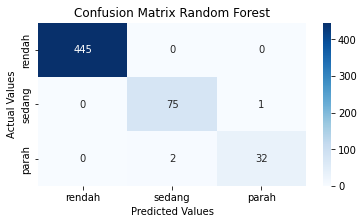

In [49]:
compare_cls(X_train, X_test, y_train, y_test)

## Ekonomi

### Preprocess

In [11]:
# Ekonomi Section (Topic id = 2)
cls_old_ekonomi = cls_old[cls_old['berita_topik_id'] == 2]
cls_old_ekonomi = cls_old_ekonomi[['sev_moneyUSD', 'sev_moneyIDR', 'sev_persen', 'sev_inflasi']]
print(len(cls_old_ekonomi))
cls_old_ekonomi.rename(columns = {'sev_moneyUSD':'USD', 'sev_moneyIDR':'IDR', 'sev_persen':'persen', 'sev_inflasi':'inflasi'}, inplace=True)
cls_old_ekonomi.dtypes

3141


USD        float64
IDR        float64
persen     float64
inflasi    float64
dtype: object

In [13]:
# cls_old_ekonomi['mati'] = [re.sub("[^0-9]", "", str(mati)) if (re.sub("[^0-9]", "", str(mati)) != '') else 1 for mati in cls_old_ekonomi['mati']]
cls_old_ekonomi['USD'] = cls_old_ekonomi['USD'].astype(int)

# cls_old_ekonomi['luka'] = [re.sub("[^0-9]", "", str(luka)) if (re.sub("[^0-9]", "", str(luka)) != '') else 1 for luka in cls_old_ekonomi['luka']]
cls_old_ekonomi['IDR'] = cls_old_ekonomi['IDR'].astype(int)

# cls_old_ekonomi['rumah'] = [re.sub("[^0-9]", "", str(rumah)) if (re.sub("[^0-9]", "", str(rumah)) != '') else 1 for rumah in cls_old_ekonomi['rumah']]
# cls_old_ekonomi['rumah'] = cls_old_ekonomi['rumah'].astype(int)

# cls_old_ekonomi['orang'] = [re.sub("[^0-9]", "", str(orang)) if (re.sub("[^0-9]", "", str(orang)) != '') else 1 for orang in cls_old_ekonomi['orang']]
cls_old_ekonomi['inflasi'] = cls_old_ekonomi['inflasi'].astype(int)
# cls_old_ekonomi = cls_old_ekonomi.replace({',': '.'}, regex=True)

cls_old_ekonomi.head()

,USD,IDR,persen,inflasi
2005,0,0,0.0,0
2006,0,0,1.0,0
2007,0,2500000,0.0,0
2008,0,100,60.0,0
2009,0,0,0.0,0


### Input Severity

In [50]:
# klasifikasi.ipynb ekonomi
def calc_eko(df):
  # Kondisi Gabungan 
  keparahanValues = []
  for i in range (0,len(df)):

    USD=df.iloc[i,0]
    IDR=df.iloc[i,1]
    persen=df.iloc[i,2]
    inflasi=df.iloc[i,3]
    # print(USD)

    # USD
    if(USD==0 or USD<=100000000 ):
      keparahanUSD=1
    
    elif(USD>100000000 or USD<=1000000000 ):
      keparahanUSD=2
    
    elif(USD>100000000 ):
      keparahanUSD=3
    
    # IDR
    if(IDR==0 or IDR<=100000000 ):
      keparahanIDR=1
    
    elif(IDR>100000000 or IDR<=1000000000 ):
      keparahanIDR=2
    
    elif(IDR>100000000 ):
      keparahanIDR=3
    
    # PERSEN
    if(persen==0 or persen<=5 ):
      keparahanPERSEN=1
    
    elif(persen>5 or persen<=10 ):
      keparahanPERSEN=2
    
    elif(persen>10 ):
      keparahanPERSEN=3
    
    # INFLASI 
    if(inflasi==0 ):
      keparahanINFLASI=1
    else:
      keparahanINFLASI=3


    # gabung USD IDR PERSEN
    if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==1 ):
      keparahan3=1 
    if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==1 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==1 ):
      keparahan3=2
    if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==1 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==1 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==1 ):
      keparahan3=3

    if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==2 ):
      keparahan3=2
    if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==2 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==2 ):
      keparahan3=3

    if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==3 ):
      keparahan3=3
    if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==3 ):
      keparahan3=3

    # gabung USD IDR PERSEN
    if(keparahan3==1 and keparahanINFLASI==1):
      keparahanTotal=1    
      # keparahanTotal="rendah"  
    if(keparahan3==1 and keparahanINFLASI==3):
      keparahanTotal=3
      # keparahanTotal="parah"
    if(keparahan3==2 and keparahanINFLASI==1):
      keparahanTotal=2    
      # keparahanTotal="sedang"  
    if(keparahan3==2 and keparahanINFLASI==3):
      keparahanTotal=3
      # keparahanTotal="parah"
    if(keparahan3==3 and keparahanINFLASI==1):
      keparahanTotal=3    
      # keparahanTotal="parah"    
    if(keparahan3==3 and keparahanINFLASI==3):
      keparahanTotal=3
      # keparahanTotal="parah"
    
    keparahanValues.append(keparahanTotal)
  return keparahanValues

In [20]:
cls_old_ekonomi['keparahannew'] = calc_eko(cls_old_ekonomi)
cls_old_ekonomi.head()

,USD,IDR,persen,inflasi,keparahannew
2005,0,0,0.0,0,1
2006,0,0,1.0,0,1
2007,0,2500000,0.0,0,1
2008,0,100,60.0,0,2
2009,0,0,0.0,0,1


### Fit & Train

In [51]:
# Declare feature vector and target variable
X = cls_old_ekonomi.drop(['keparahannew'], axis=1)
y = cls_old_ekonomi['keparahannew']

In [52]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train))
print(len(X_test))
print(X_train.shape, X_test.shape)

2512
629
(2512, 4) (629, 4)


In [53]:
X_train

,USD,IDR,persen,inflasi
3298,0,0,0.0,0
2118,0,0,29.2,1
3429,0,0,0.0,0
3508,0,1,5.6,1
3917,1,1,0.0,1
...,...,...,...,...
2768,0,0,0.0,0
2840,0,0,5.0,0
3658,0,0,100.0,0
10108,0,0,0.0,0


In [54]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model accuracy score
Naive Bayes : 0.9571
Random Forest : 0.9984
Logistic Regression : 0.8998
Decision Tree : 0.9984
SVM : 0.8903
KNearestNeighbors : 0.9936
Deep Learning (MLP) : 0.9936

Average cross-validation score
Naive Bayes: 0.9506
Random Forest: 0.9992
Logistic Regression: 0.8762
Decision Tree: 1.0000
SVM: 0.8742
KNearestNeighbors: 0.9956
Deep Learning (MLP): 0.9857

Training set score: 1.0000
Test set score: 0.9984

f1 score bencana
Naive Bayes: 0.9579
Random Forest: 0.9984
Logistic Regression: 0.8863
Decision Tree: 0.9984
SVM: 0.8733
KNearestNeighbors: 0.9936
Deep Learning (MLP): 0.9936

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00       423
      sedang       1.00      0.99      1.00       124
       parah       1.00      1.00      1.00        82

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



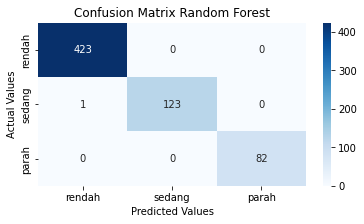

In [55]:
compare_cls(X_train, X_test, y_train, y_test)

## Kecelakaan

### Preprocess

In [ ]:
# Kecelakaan Section (Topic id = 3)
cls_old_kecelakaan = cls_old[cls_old['berita_topik_id'] == 3]
cls_old_kecelakaan = cls_old_kecelakaan[['sev_death', 'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane']]
print(len(cls_old_kecelakaan))
cls_old_kecelakaan.rename(columns = {'sev_death':'USD', 'sev_injury':'IDR', 'sev_lost':'persen', 'sev_sink':'inflasi', 'sev_plane':'inflasi'}, inplace=True)
cls_old_kecelakaan.dtypes

### Input Severity

### Fit & Train

## Kesehatan

### Preprocess

### Input Severity

### Fit & Train

## Kriminalitas

### Preprocess

### Input Severity

### Fit & Train

## Olahraga

### Preprocess

### Input Severity

### Fit & Train